`07` 럭키 스트레이트

In [1]:
n = input()
l = len(n) // 2
if sum([int(i) for i in n[:l]]) == sum([int(i) for i in n[l:]]):
    print('LUCKY')
else:
    print('READY')

 123123


LUCKY


`09` 문자열 압축   
```python
['abc', 'abc', 'abc', 'aaa', 'def', 'def']
conti_li = [3,2]
score = (글자수) * (연속한 횟수 -1) - (앞에 붙는 숫자의 길이)
```

In [54]:
import math

def solution(s):
    max_score = 0 # 압축으로 이득 본 글자 수

    for l in range(1, len(s) // 2 + 1):
        conti_li = []
        conti = 1
        for i in range(math.ceil(len(s) / l)): # l개씩 끊어읽기
            piece = s[i * l:(i + 1) * l]
            if i == 0:
                prev = piece
                continue

            if piece == prev:
                conti += 1
            else:
                if conti > 1:
                    conti_li.append(conti)
                conti = 1
                prev = piece

        if conti > 1:
            conti_li.append(conti) # 마지막에도 연속한 게 있으면 추가

        score = 0
        for conti in conti_li:
            score += l * (conti - 1)
            score -= len(str(conti))
        if score > max_score:
            max_score = score

    return len(s) - max_score

In [55]:
s = input()
solution(s)

 aabbaccc


7

`11` 뱀

In [68]:
import operator

DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]


class snake():
    
    def __init__(self):
        
        self.coords = [(0, 0)]
        self.direction = 0
        self.dead = False
        
        
    def move(self, board):
        
        head = tuple(map(operator.add, self.coords[0], DIRECTIONS[self.direction]))
        if min(head) < 0 or max(head) >= board.n or head in self.coords: # 벽 또는 자신의 몸을 만난 경우
            self.dead = True
        elif board.state[head[0]][head[1]] == 1: # 사과를 만난 경우
            self.coords.insert(0, head)
            board.erase_apple(head)
        else:
            self.coords.insert(0, head)
            del self.coords[-1] # remove tail
                    
                
    def rotate(self, ld):
        if ld == 'D':
            self.direction = (self.direction + 1) % 4
        elif ld == 'L':
            self.direction = (self.direction - 1) % 4
    

    
class board():
    
    def __init__(self, n, k_coords):
        
        self.n = n
        self.state = [[0 for i in range(n)] for i in range(n)]
        for y, x in k_coords:
            self.state[y - 1][x - 1] = 1
               
                
    def erase_apple(self, coord):
        
        self.state[coord[0]][coord[1]] = 0


def play_game(snake, board, rotate_plan):
    passed_time = 0

    while not snake.dead:
        snake.move(board)
        passed_time += 1

        if rotate_plan and passed_time == rotate_plan[0][0]:
            snake.rotate(rotate_plan.pop(0)[1])
        
    return passed_time


n = int(input())
k = int(input())
k_coords = [tuple([int(i) for i in input().split()]) for _ in range(k)]

l = int(input())
rotate_plan = [[i for i in input().split()] for _ in range(l)]
rotate_plan = [(int(i[0]), i[1]) for i in rotate_plan]

snake = snake()
board = board(n, k_coords)
print(play_game(snake, board, rotate_plan))

 10
 4
 1 2
 1 3
 1 4
 1 5
 4
 8 D
 10 D
 11 D
 13 L


21


`13` 치킨 배달

In [69]:
n, m = 5, 3
map_state = [[0, 0, 1, 0, 0],
             [0, 0, 2, 0, 1],
             [0, 1, 2, 0, 0],
             [0, 0, 1, 0, 0],
             [0, 0, 0, 0, 2]]

In [85]:
from itertools import combinations

def cal_dist(house, chicken):
    return abs(house[0] - chicken[0]) + abs(house[1] - chicken[1])


def sum_dist(chickens_candidates):
    ans = 0
    for house in houses:
        ans += min([cal_dist(house, chicken) for chicken in chickens_candidates])
    return ans


n, m = [int(i) for i in input().split()]
map_state = [[int(i) for i in input().split()] for row in range(n)]


chickens = []
houses = []
for y, row in enumerate(map_state):
    for x, val in enumerate(row):
        if val == 1:
            houses.append((y, x))
        if val == 2:
            chickens.append((y, x))

chicken_dist = min([sum_dist(chickens_candidates) for chickens_candidates in combinations(chickens, m)])
print(chicken_dist)

`08` 문자열 재정렬   

In [11]:
#s = 'AJKDLSI412K4JSJ9D'
s = input()

_s = ''
_n = 0
for c in s:
    if ord(c) >= 65:
        _s += c # 문자열 더해서 새로 만드는 것보다 리스트에 집어넣고 마지막에만 join하는 게 더 빠름
    else:
        _n += int(c)

print(''.join(sorted(_s)) + str(_n))

 K1K5


KK6


`10` 자물쇠와 열쇠   
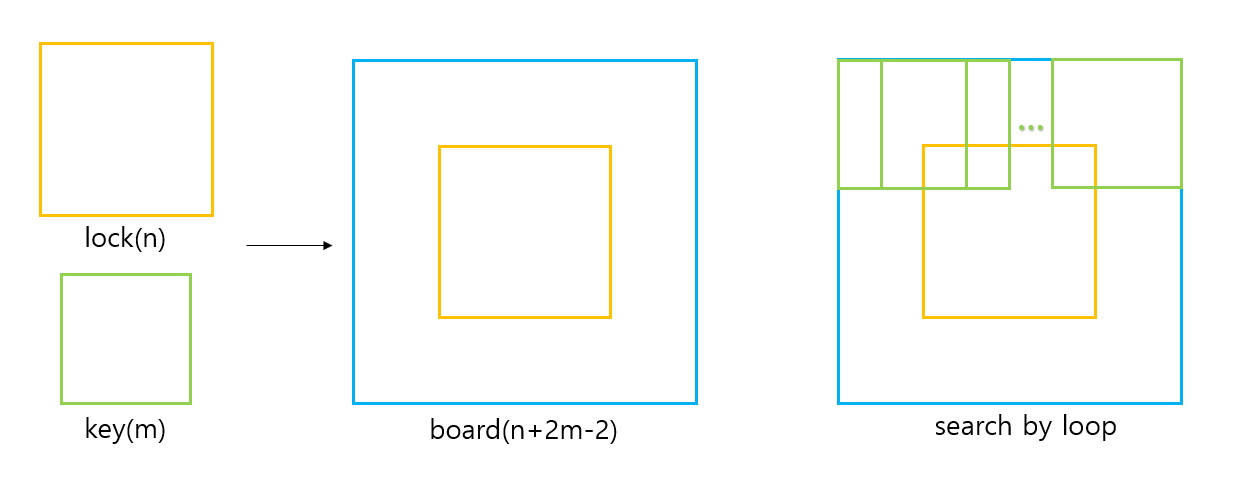

In [1]:
key = [[0, 0, 0], [1, 0, 0], [0, 1, 1]]
lock = [[1, 1, 1], [1, 1, 0], [1, 0, 1]]

In [3]:
def get_key_coords(key):
    key_coords = []
    for y, row in enumerate(key):
        for x, val in enumerate(row):
            if val == 1:
                key_coords.append((y, x))
    return key_coords
            
def get_lock_coords(lock):
    lock_coords = []
    for y, row in enumerate(lock):
        for x, val in enumerate(row):
            if val == 1:
                lock_coords.append((y, x))
    return lock_coords

def make_board(lock_coords):
    board = [[0 for _ in range(n + 2*m - 2)] for _ in range(n + 2*m - 2)]
    for y, x in lock_coords:
        board[y + m - 1][x + m - 1] += 1
    return board

def put_key(board, key_coords, j, i):
    for y, x in key_coords:
        board[y + j][x + i] += 1
    return board

def check(board):
    for y in range(m - 1, n + m - 1):
        for x in range(m - 1, n + m - 1):
            if board[y][x] != 1:
                return False
    return True

def rotate_clockwise(key_coords):
    return [(i, m - j - 1) for j, i in key_coords]

def solution(key, lock):
    key_coords = get_key_coords(key)
    lock_coords = get_lock_coords(lock)
    
    global m
    m = len(key)
    global n
    n = len(lock)
    for r in range(4):
        for j in range(n + m - 1):
            for i in range(n + m - 1):
                board = make_board(lock_coords)
                board = put_key(board, key_coords, j, i)
                
                if check(board):
                    return True
        key_coords = rotate_clockwise(key_coords)
    return False

In [4]:
solution(key, lock)

True

`12` 기둥과 보 설치

In [6]:
n = 5
build_frame = 	[[0,0,0,1],[2,0,0,1],[4,0,0,1],[0,1,1,1],[1,1,1,1],[2,1,1,1],[3,1,1,1],[2,0,0,0],[1,1,1,0],[2,2,0,1]]

In [ ]:
def valid_gidung(x, y):
    return y == 0 or ([x - 1, y, 1] in state) or ([x, y, 1] in state) or ([x, y - 1, 0] in state)
    
def valid_bo(x, y):
    return ([x, y - 1, 0] in state) or ([x + 1, y - 1, 0] in state) or (([x - 1, y, 1] in state) and ([x + 1, y, 1] in state))

def add_gidung(x, y):
    if valid_gidung(x, y):
        state.append([x, y, 0])

def add_bo(x, y):
    if valid_bo(x, y):
        state.append([x, y, 1])
                     
def remove_gidung(x, y):
    state.remove([x, y, 0])
    if ([x, y + 1, 0] in state and not valid_gidung(x, y + 1)) or ([x - 1, y + 1, 1] in state and not valid_bo(x - 1, y + 1)) or ([x, y + 1, 1] in state and not valid_bo(x, y + 1)):
        state.append([x, y, 0])
        
def remove_bo(x, y):
    state.remove([x, y, 1])
    if (([x, y, 0] in state and not valid_gidung(x, y)) or ([x + 1, y, 0] in state and not valid_gidung(x + 1, y)) or ([x - 1, y, 1] in state and not valid_bo(x - 1, y)) or ([x + 1, y, 1] in state and not valid_bo(x + 1, y))):
        state.append([x, y, 1])

def solution(n, build_frame):
    global state
    state = []
    for x, y, a, b in build_frame:
        
        if b == 1: # 설치
            if a == 0: #기둥
                add_gidung(x, y)
            else:
                add_bo(x, y)
        else:
            if a == 0:
                remove_gidung(x, y)
            else:
                remove_bo(x, y)
        # print(state)
    
    state.sort()
    return state

In [18]:
solution(n, build_frame)

[[0, 0, 0]]
[[0, 0, 0], [2, 0, 0]]
[[0, 0, 0], [2, 0, 0], [4, 0, 0]]
[[0, 0, 0], [2, 0, 0], [4, 0, 0], [0, 1, 1]]
[[0, 0, 0], [2, 0, 0], [4, 0, 0], [0, 1, 1], [1, 1, 1]]
[[0, 0, 0], [2, 0, 0], [4, 0, 0], [0, 1, 1], [1, 1, 1], [2, 1, 1]]
[[0, 0, 0], [2, 0, 0], [4, 0, 0], [0, 1, 1], [1, 1, 1], [2, 1, 1], [3, 1, 1]]
[[0, 0, 0], [4, 0, 0], [0, 1, 1], [1, 1, 1], [2, 1, 1], [3, 1, 1]]
[[0, 0, 0], [4, 0, 0], [0, 1, 1], [2, 1, 1], [3, 1, 1], [1, 1, 1]]
[[0, 0, 0], [4, 0, 0], [0, 1, 1], [2, 1, 1], [3, 1, 1], [1, 1, 1]]


[[0, 0, 0], [0, 1, 1], [1, 1, 1], [2, 1, 1], [3, 1, 1], [4, 0, 0]]

`14` 외벽 점검

띠의 가장 긴 조각을 제외하고 n(친구수)조각으로 나누는 문제. 단, 조각을 자를 때마다 취약 지점이 없는 부분은 버린다.   
- n=1,2,3... 으로 증가(greedy)   
- 어떻게 조각을 자를지는 완전탐색
- 잘랐을 때 각각의 조각의 크기가 dist의 원소의 크기보다 작거나 같으면 된다.

In [92]:
from itertools import combinations

def solution(n, weak, dist):
    weak_dist = [weak[i] - weak[i-1] for i in range(len(weak))]
    weak_dist[0] = weak_dist[0] + n
    dist = sorted(dist)
    
    n_friend = 1
    
    while True:
        selected_dist = dist[-1 : -1 - n_friend : -1]
        
        for exclude_index in combinations(range(len(weak_dist)), n_friend):
            _weak_dist = weak_dist.copy()
            for index in exclude_index:
                _weak_dist[index] = 0

            opt_pieces = []
            tmp_sum = 0
            for d in _weak_dist:
                if d == 0:
                    opt_pieces.append(tmp_sum)
                    tmp_sum = 0
                tmp_sum += d
            opt_pieces[0] = opt_pieces[0] + tmp_sum
            opt_pieces = sorted(opt_pieces, reverse=True)

            success = True
            for s, o in zip(selected_dist, opt_pieces):
                if s < o:
                    success = False
                    continue
            if success:
                return n_friend

        n_friend += 1
        if n_friend > len(dist):
            return -1

In [93]:
n = 200
weak = [0,40,80,120,160]
dist = [40,40,40,40,40,40]

solution(n, weak, dist)

3

In [94]:
#### 완전탐색 대신 큰 조각을 버리면 되지 않을까 했는데, 방금 자른 부분 바로 옆을 버리는 건 손해

# def solution(n, weak, dist):
#     weak_dist = [weak[i] - weak[i-1] for i in range(len(weak))]
#     weak_dist[0] = weak_dist[0] + n
#     dist = sorted(dist)
    
#     n_friend = 1
    
#     while True:
#         selected_dist = dist[-1 : -1 - n_friend : -1]
#         max_dist = max(weak_dist)
#         for i, d in enumerate(weak_dist):
#             if d == max_dist:
#                 weak_dist[i] = 0
#                 break

#         opt_pieces = []
#         tmp_sum = 0
#         for d in weak_dist:
#             if d == 0:
#                 opt_pieces.append(tmp_sum)
#                 tmp_sum = 0
#             tmp_sum += d
#         opt_pieces[0] = opt_pieces[0] + tmp_sum
#         opt_pieces = sorted(opt_pieces, reverse=True)
    
#         success = True
#         for s, o in zip(selected_dist, opt_pieces):
#             if s < o:
#                 success = False
#                 break
#         if success:
#             return n_friend
        
#         n_friend += 1
#         if n_friend > len(dist):
#             return -1